In [80]:
import os
import glob
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [81]:
def get_date(dt):
    return dt.date

def get_year(dt):
    return dt.year

def get_month(dt):
    return dt.month


def get_day(dt):
    return dt.day

def get_weekday(dt):
    return dt.weekday() # .weekday() is a method

def get_hour(dt):
    return dt.hour

def get_min(dt):
    return dt.minute


def get_sec(dt):
    return dt.second

def get_time(dt):
    return dt.time()

In [93]:
drives = pd.read_csv ('drives.csv', sep=';')
logins = pd.read_csv ('logins.csv', sep=',')
locations = pd.read_csv ('locations.csv', sep=';')

# Traitement fichier 1 waze drives

In [94]:
drives["Date"]= drives["Date"].map(pd.to_datetime)
drives["date"] = drives["Date"].map(get_date)
drives.dropna(subset=['Destination'],inplace=True)
drives

,Date,Source,Source_loc,s_lat,s_long,Destination,Destination_loc,d_lat,d_long,date
0,2021-09-16 19:49:02+00:00,France La Courneuve Rue Nungesser (2.41442 48....,2.41442 48.933757,2.414420,48.933757,France Aulnay-sous-Bois Avenue de Pomereu (2.4...,2.494455 48.921425,2.494455,48.921425,2021-09-16
1,2021-09-16 21:59:40+00:00,France Aulnay-sous-Bois Avenue de Pomereu (2.4...,2.494455 48.921425,2.494455,48.921425,France La Courneuve Rue Nungesser (2.41442 48....,2.41442 48.933757,2.414420,48.933757,2021-09-16
3,2021-09-18 01:02:02+00:00,France La Courneuve Rue Nungesser (2.41442 48....,2.41442 48.933757,2.414420,48.933757,France Aulnay-sous-Bois Avenue de Pomereu (2.4...,2.494455 48.921425,2.494455,48.921425,2021-09-18
4,2021-09-18 10:59:00+00:00,France Aulnay-sous-Bois Avenue de Pomereu (2.4...,2.494455 48.921425,2.494455,48.921425,France La Courneuve Rue Nungesser (2.41442 48....,2.41442 48.933757,2.414420,48.933757,2021-09-18
6,2021-09-18 15:48:58+00:00,NaN,NaN,NaN,NaN,France La Courneuve Rue Nungesser (2.41442 48....,2.41442 48.933757,2.414420,48.933757,2021-09-18
...,...,...,...,...,...,...,...,...,...,...
386,2021-12-14 20:28:12+00:00,FR Seine-Saint-Denis Bobigny 185-187 Avenue He...,2.434918 48.912599,2.434918,48.912599,France La Courneuve Rue Nungesser (2.41442 48....,2.41442 48.933757,2.414420,48.933757,2021-12-14
387,2021-12-15 16:42:34+00:00,France La Courneuve Rue Nungesser (2.41442 48....,2.41442 48.933757,2.414420,48.933757,France IDF La Courneuve Rue Anatole France 124...,2.39873 48.92366,2.398730,48.923660,2021-12-15
388,2021-12-15 16:42:37+00:00,France La Courneuve Rue Nungesser (2.41442 48....,2.41442 48.933757,2.414420,48.933757,France IDF La Courneuve Rue Anatole France 124...,2.39873 48.92366,2.398730,48.923660,2021-12-15
389,2021-12-15 16:51:04+00:00,France La Courneuve Rue Nungesser (2.41442 48....,2.41442 48.933757,2.414420,48.933757,France IDF La Courneuve Rue Anatole France 124...,2.39873 48.92366,2.398730,48.923660,2021-12-15


# Traitement fichier 2 waze logins

In [95]:
logins.drop(["Device Manufacturer","Device Model","Device OS Version","Waze Version"],axis=1,inplace=True)
logins

,Login Time,Logout Time,Total Distance (Kilometers)
0,2021-11-06 13:11:46 GMT,2021-11-06 13:12:02 GMT,0
1,2021-11-06 13:38:05 GMT,2021-11-06 14:47:02 GMT,44
2,2021-11-06 17:20:31 GMT,2021-11-06 18:04:01 GMT,0
3,2021-11-07 13:14:53 GMT,2021-11-07 13:24:11 GMT,0
4,2021-11-07 21:37:45 GMT,2021-11-07 21:42:40 GMT,0
...,...,...,...
112,2021-12-16 11:20:44 GMT,2021-12-16 11:26:43 GMT,1
113,2021-12-16 11:42:36 GMT,2021-12-16 11:42:39 GMT,0
114,2021-12-16 11:57:17 GMT,2021-12-16 12:02:30 GMT,0
115,2021-12-16 12:04:21 GMT,2021-12-16 12:09:06 GMT,0


In [96]:
logins["Login Time"] = logins["Login Time"].map(pd.to_datetime)
logins["Logout Time"] = logins["Logout Time"].map(pd.to_datetime)

logins['duree'] = logins["Logout Time"] - logins["Login Time"]
logins['date'] = logins["Login Time"].map(get_date)
logins

,Login Time,Logout Time,Total Distance (Kilometers),duree,date
0,2021-11-06 13:11:46+00:00,2021-11-06 13:12:02+00:00,0,00:00:16,2021-11-06
1,2021-11-06 13:38:05+00:00,2021-11-06 14:47:02+00:00,44,01:08:57,2021-11-06
2,2021-11-06 17:20:31+00:00,2021-11-06 18:04:01+00:00,0,00:43:30,2021-11-06
3,2021-11-07 13:14:53+00:00,2021-11-07 13:24:11+00:00,0,00:09:18,2021-11-07
4,2021-11-07 21:37:45+00:00,2021-11-07 21:42:40+00:00,0,00:04:55,2021-11-07
...,...,...,...,...,...
112,2021-12-16 11:20:44+00:00,2021-12-16 11:26:43+00:00,1,00:05:59,2021-12-16
113,2021-12-16 11:42:36+00:00,2021-12-16 11:42:39+00:00,0,00:00:03,2021-12-16
114,2021-12-16 11:57:17+00:00,2021-12-16 12:02:30+00:00,0,00:05:13,2021-12-16
115,2021-12-16 12:04:21+00:00,2021-12-16 12:09:06+00:00,0,00:04:45,2021-12-16


In [86]:
#merge
waze_full = logins.merge(drives,on="date",how="left")
waze_full_unique = waze_full.drop_duplicates(subset=['Login Time'], keep ='first')
waze_full_unique.reset_index(inplace=True)
waze_full_unique.drop(["Date","index"],axis=1,inplace=True)
waze_full_unique.rename(columns={"Total Distance (Kilometers)":"Total_distance"},inplace=True)
waze_full_unique["duree_min"] = waze_full_unique["duree"].apply(lambda x : x.seconds/60)
waze_full_unique["date"] = waze_full_unique["date"].map(pd.to_datetime)
#a.loc[184,"Destination"]

C:\Users\marko\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\marko\anaconda3\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
<ipython-input-86-edb7007cec55>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  waze_full_unique["duree_m

In [124]:
waze_full_unique

,index,Login Time,Logout Time,Total_distance,duree,date,Source,Source_loc,s_lat,s_long,Destination,Destination_loc,d_lat,d_long,duree_min,Destination_propre
0,0,2021-11-06 13:11:46+00:00,2021-11-06 13:12:02+00:00,0,00:00:16,2021-11-06,France La Courneuve Rue Nungesser (2.41442 48....,2.41442 48.933757,2.41442,48.933757,France IDF Pomponne Rue Beauséjour 26 (2.69954...,2.699547 48.883758,2.699547,48.883758,0.266667,France IDF Pomponne Rue Beauséjour 26
1,1,2021-11-06 13:38:05+00:00,2021-11-06 14:47:02+00:00,44,01:08:57,2021-11-06,France La Courneuve Rue Nungesser (2.41442 48....,2.41442 48.933757,2.41442,48.933757,France IDF Pomponne Rue Beauséjour 26 (2.69954...,2.699547 48.883758,2.699547,48.883758,68.950000,France IDF Pomponne Rue Beauséjour 26
2,2,2021-11-06 17:20:31+00:00,2021-11-06 18:04:01+00:00,0,00:43:30,2021-11-06,France La Courneuve Rue Nungesser (2.41442 48....,2.41442 48.933757,2.41442,48.933757,France IDF Pomponne Rue Beauséjour 26 (2.69954...,2.699547 48.883758,2.699547,48.883758,43.500000,France IDF Pomponne Rue Beauséjour 26
3,3,2021-11-07 13:14:53+00:00,2021-11-07 13:24:11+00:00,0,00:09:18,2021-11-07,France IDF La Courneuve Rue Anatole France 124...,2.39873 48.92366,2.39873,48.923660,France La Courneuve Rue Nungesser (2.41442 48....,2.41442 48.933757,2.414420,48.933757,9.300000,France La Courneuve Rue Nungesser
4,4,2021-11-07 21:37:45+00:00,2021-11-07 21:42:40+00:00,0,00:04:55,2021-11-07,France IDF La Courneuve Rue Anatole France 124...,2.39873 48.92366,2.39873,48.923660,France La Courneuve Rue Nungesser (2.41442 48....,2.41442 48.933757,2.414420,48.933757,4.916667,France La Courneuve Rue Nungesser
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,107,2021-12-14 19:50:58+00:00,2021-12-14 20:27:47+00:00,34,00:36:49,2021-12-14,France La Courneuve Rue Nungesser (2.41442 48....,2.41442 48.933757,2.41442,48.933757,France IDF Pomponne Rue Beauséjour 26 (2.69954...,2.699547 48.883758,2.699547,48.883758,36.816667,France IDF Pomponne Rue Beauséjour 26
101,108,2021-12-14 20:27:47+00:00,2021-12-14 20:52:16+00:00,0,00:24:29,2021-12-14,France La Courneuve Rue Nungesser (2.41442 48....,2.41442 48.933757,2.41442,48.933757,France IDF Pomponne Rue Beauséjour 26 (2.69954...,2.699547 48.883758,2.699547,48.883758,24.483333,France IDF Pomponne Rue Beauséjour 26
102,109,2021-12-15 16:39:44+00:00,2021-12-15 16:42:44+00:00,0,00:03:00,2021-12-15,France La Courneuve Rue Nungesser (2.41442 48....,2.41442 48.933757,2.41442,48.933757,France IDF La Courneuve Rue Anatole France 124...,2.39873 48.92366,2.398730,48.923660,3.000000,France IDF La Courneuve Rue Anatole France 124
103,110,2021-12-15 16:50:59+00:00,2021-12-15 17:03:04+00:00,2,00:12:05,2021-12-15,France La Courneuve Rue Nungesser (2.41442 48....,2.41442 48.933757,2.41442,48.933757,France IDF La Courneuve Rue Anatole France 124...,2.39873 48.92366,2.398730,48.923660,12.083333,France IDF La Courneuve Rue Anatole France 124


In [125]:
waze_full_unique.to_csv('waze_full_unique.csv', encoding='utf-8')

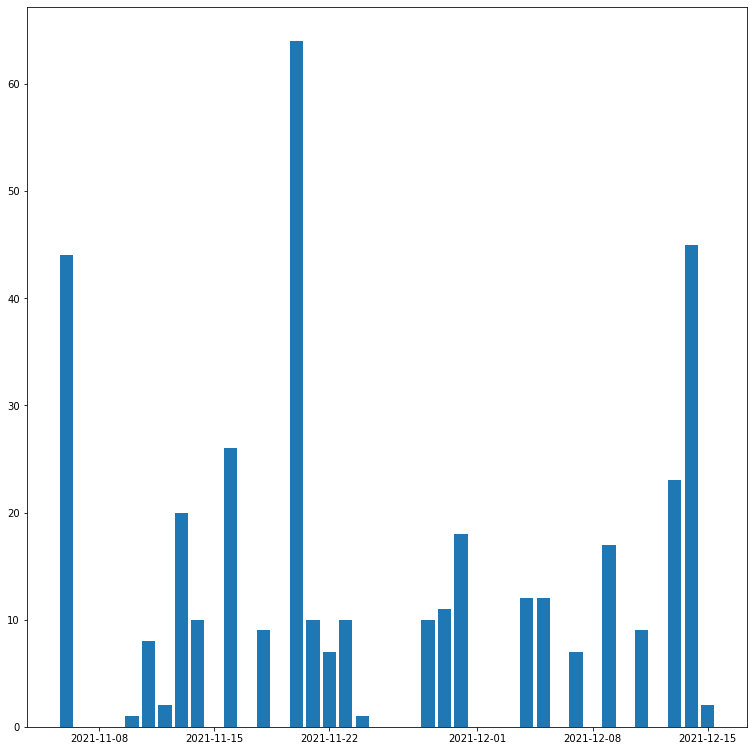

In [123]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = list(waze_full_unique['date'])
students = list(waze_full_unique['Total_distance'])
ax.bar(langs,students)
plt.show()

In [99]:
!pip install nltk
import nltk
nltk.download('punkt')

from collections import Counter
from nltk.corpus import stopwords
import string

!pip install wordcloud
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\marko\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [100]:
waze_full_unique

,Login Time,Logout Time,Total_distance,duree,date,Source,Source_loc,s_lat,s_long,Destination,Destination_loc,d_lat,d_long,duree_min
0,2021-11-06 13:11:46+00:00,2021-11-06 13:12:02+00:00,0,00:00:16,2021-11-06,France La Courneuve Rue Nungesser (2.41442 48....,2.41442 48.933757,2.41442,48.933757,France IDF Pomponne Rue Beauséjour 26 (2.69954...,2.699547 48.883758,2.699547,48.883758,0.266667
1,2021-11-06 13:38:05+00:00,2021-11-06 14:47:02+00:00,44,01:08:57,2021-11-06,France La Courneuve Rue Nungesser (2.41442 48....,2.41442 48.933757,2.41442,48.933757,France IDF Pomponne Rue Beauséjour 26 (2.69954...,2.699547 48.883758,2.699547,48.883758,68.950000
2,2021-11-06 17:20:31+00:00,2021-11-06 18:04:01+00:00,0,00:43:30,2021-11-06,France La Courneuve Rue Nungesser (2.41442 48....,2.41442 48.933757,2.41442,48.933757,France IDF Pomponne Rue Beauséjour 26 (2.69954...,2.699547 48.883758,2.699547,48.883758,43.500000
3,2021-11-07 13:14:53+00:00,2021-11-07 13:24:11+00:00,0,00:09:18,2021-11-07,France IDF La Courneuve Rue Anatole France 124...,2.39873 48.92366,2.39873,48.923660,France La Courneuve Rue Nungesser (2.41442 48....,2.41442 48.933757,2.414420,48.933757,9.300000
4,2021-11-07 21:37:45+00:00,2021-11-07 21:42:40+00:00,0,00:04:55,2021-11-07,France IDF La Courneuve Rue Anatole France 124...,2.39873 48.92366,2.39873,48.923660,France La Courneuve Rue Nungesser (2.41442 48....,2.41442 48.933757,2.414420,48.933757,4.916667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,2021-12-16 11:20:44+00:00,2021-12-16 11:26:43+00:00,1,00:05:59,2021-12-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.983333
113,2021-12-16 11:42:36+00:00,2021-12-16 11:42:39+00:00,0,00:00:03,2021-12-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.050000
114,2021-12-16 11:57:17+00:00,2021-12-16 12:02:30+00:00,0,00:05:13,2021-12-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.216667
115,2021-12-16 12:04:21+00:00,2021-12-16 12:09:06+00:00,0,00:04:45,2021-12-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.750000


In [128]:
waze_full_unique.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   index               105 non-null    int64              
 1   Login Time          105 non-null    datetime64[ns, UTC]
 2   Logout Time         105 non-null    datetime64[ns, UTC]
 3   Total_distance      105 non-null    int64              
 4   duree               105 non-null    timedelta64[ns]    
 5   date                105 non-null    datetime64[ns]     
 6   Source              88 non-null     object             
 7   Source_loc          88 non-null     object             
 8   s_lat               88 non-null     float64            
 9   s_long              88 non-null     float64            
 10  Destination         105 non-null    object             
 11  Destination_loc     105 non-null    object             
 12  d_lat               105 non-null    

In [101]:
waze_full_unique.dropna(subset=["Destination"],inplace=True)
waze_full_unique["Destination_propre"] = waze_full_unique["Destination"].apply(lambda x: x.split("("))
waze_full_unique["Destination_propre"] = waze_full_unique["Destination_propre"].apply(lambda x: x[0] if len(x)!=0 else x)
waze_full_unique.reset_index(inplace=True)

<ipython-input-101-216ea934c0ac>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  waze_full_unique.dropna(subset=["Destination"],inplace=True)
<ipython-input-101-216ea934c0ac>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  waze_full_unique["Destination_propre"] = waze_full_unique["Destination"].apply(lambda x: x.split("("))
<ipython-input-101-216ea934c0ac>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

In [102]:
waze_full_unique

,index,Login Time,Logout Time,Total_distance,duree,date,Source,Source_loc,s_lat,s_long,Destination,Destination_loc,d_lat,d_long,duree_min,Destination_propre
0,0,2021-11-06 13:11:46+00:00,2021-11-06 13:12:02+00:00,0,00:00:16,2021-11-06,France La Courneuve Rue Nungesser (2.41442 48....,2.41442 48.933757,2.41442,48.933757,France IDF Pomponne Rue Beauséjour 26 (2.69954...,2.699547 48.883758,2.699547,48.883758,0.266667,France IDF Pomponne Rue Beauséjour 26
1,1,2021-11-06 13:38:05+00:00,2021-11-06 14:47:02+00:00,44,01:08:57,2021-11-06,France La Courneuve Rue Nungesser (2.41442 48....,2.41442 48.933757,2.41442,48.933757,France IDF Pomponne Rue Beauséjour 26 (2.69954...,2.699547 48.883758,2.699547,48.883758,68.950000,France IDF Pomponne Rue Beauséjour 26
2,2,2021-11-06 17:20:31+00:00,2021-11-06 18:04:01+00:00,0,00:43:30,2021-11-06,France La Courneuve Rue Nungesser (2.41442 48....,2.41442 48.933757,2.41442,48.933757,France IDF Pomponne Rue Beauséjour 26 (2.69954...,2.699547 48.883758,2.699547,48.883758,43.500000,France IDF Pomponne Rue Beauséjour 26
3,3,2021-11-07 13:14:53+00:00,2021-11-07 13:24:11+00:00,0,00:09:18,2021-11-07,France IDF La Courneuve Rue Anatole France 124...,2.39873 48.92366,2.39873,48.923660,France La Courneuve Rue Nungesser (2.41442 48....,2.41442 48.933757,2.414420,48.933757,9.300000,France La Courneuve Rue Nungesser
4,4,2021-11-07 21:37:45+00:00,2021-11-07 21:42:40+00:00,0,00:04:55,2021-11-07,France IDF La Courneuve Rue Anatole France 124...,2.39873 48.92366,2.39873,48.923660,France La Courneuve Rue Nungesser (2.41442 48....,2.41442 48.933757,2.414420,48.933757,4.916667,France La Courneuve Rue Nungesser
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,107,2021-12-14 19:50:58+00:00,2021-12-14 20:27:47+00:00,34,00:36:49,2021-12-14,France La Courneuve Rue Nungesser (2.41442 48....,2.41442 48.933757,2.41442,48.933757,France IDF Pomponne Rue Beauséjour 26 (2.69954...,2.699547 48.883758,2.699547,48.883758,36.816667,France IDF Pomponne Rue Beauséjour 26
101,108,2021-12-14 20:27:47+00:00,2021-12-14 20:52:16+00:00,0,00:24:29,2021-12-14,France La Courneuve Rue Nungesser (2.41442 48....,2.41442 48.933757,2.41442,48.933757,France IDF Pomponne Rue Beauséjour 26 (2.69954...,2.699547 48.883758,2.699547,48.883758,24.483333,France IDF Pomponne Rue Beauséjour 26
102,109,2021-12-15 16:39:44+00:00,2021-12-15 16:42:44+00:00,0,00:03:00,2021-12-15,France La Courneuve Rue Nungesser (2.41442 48....,2.41442 48.933757,2.41442,48.933757,France IDF La Courneuve Rue Anatole France 124...,2.39873 48.92366,2.398730,48.923660,3.000000,France IDF La Courneuve Rue Anatole France 124
103,110,2021-12-15 16:50:59+00:00,2021-12-15 17:03:04+00:00,2,00:12:05,2021-12-15,France La Courneuve Rue Nungesser (2.41442 48....,2.41442 48.933757,2.41442,48.933757,France IDF La Courneuve Rue Anatole France 124...,2.39873 48.92366,2.398730,48.923660,12.083333,France IDF La Courneuve Rue Anatole France 124


In [103]:
destination = []
for i in range(len(waze_full_unique)):
    destination.append(waze_full_unique.loc[i,"Destination_propre"])

In [104]:
all_tokens1 = []
for line in destination:
    for mot in line.split():
        all_tokens1.append(mot)

In [108]:
total_term_frequency = Counter(all_tokens1)


for word, freq in total_term_frequency.most_common(25):
    print("{}\t{}".format(word, freq))

France	106
Rue	60
IDF	47
de	45
Avenue	43
Aulnay-sous-Bois	41
Pomereu	36
Paris	26
La	23
Courneuve	23
Anatole	15
124	15
FR	14
Georgette	10
Agutte	10
16	10
Dunkerque	9
18	9
Pomponne	8
Beauséjour	8
26	8
Nungesser	8
Didot	7
96	7
Drancy	5


In [109]:
tfdict = {}
for w, f in total_term_frequency.most_common():
    
    
    relative_tf = f / sum(list(total_term_frequency.values())) # nobre relative
    tfdict[w]  = relative_tf

tfdict

{'France': 0.16692913385826771,
 'Rue': 0.09448818897637795,
 'IDF': 0.07401574803149606,
 'de': 0.07086614173228346,
 'Avenue': 0.06771653543307087,
 'Aulnay-sous-Bois': 0.06456692913385827,
 'Pomereu': 0.05669291338582677,
 'Paris': 0.04094488188976378,
 'La': 0.03622047244094488,
 'Courneuve': 0.03622047244094488,
 'Anatole': 0.023622047244094488,
 '124': 0.023622047244094488,
 'FR': 0.02204724409448819,
 'Georgette': 0.015748031496062992,
 'Agutte': 0.015748031496062992,
 '16': 0.015748031496062992,
 'Dunkerque': 0.014173228346456693,
 '18': 0.014173228346456693,
 'Pomponne': 0.012598425196850394,
 'Beauséjour': 0.012598425196850394,
 '26': 0.012598425196850394,
 'Nungesser': 0.012598425196850394,
 'Didot': 0.011023622047244094,
 '96': 0.011023622047244094,
 'Drancy': 0.007874015748031496,
 'Seine-Saint-Denis': 0.007874015748031496,
 'Jeanne': 0.007874015748031496,
 "d'Arc": 0.007874015748031496,
 '4': 0.007874015748031496,
 'Saint-Stenay': 0.004724409448818898,
 '60': 0.0047244094

In [110]:
!pip install WordCloud
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt

In [112]:
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 10)

Populating the interactive namespace from numpy and matplotlib


C:\Users\marko\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [135]:
from os import path
import numpy as np
from PIL import Image
import os
from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS

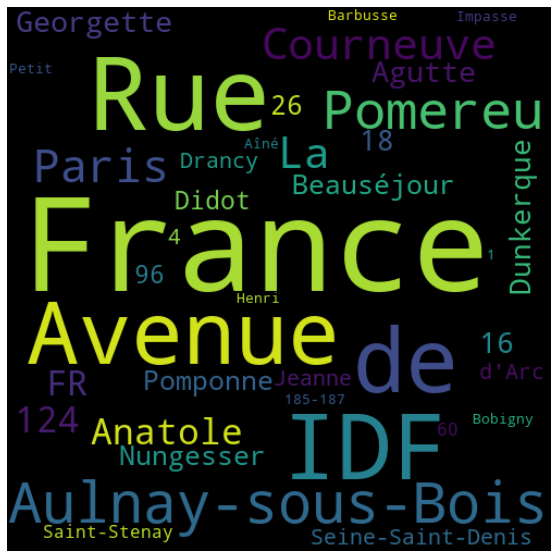

In [134]:
wordcloud = WordCloud(
                      #mask = keakr_mask,
                      stopwords=STOPWORDS,
                      background_color='black',
                      mode = 'RGB',
                      max_words=1000,
                      width=500,
                      height=500
                     ).generate_from_frequencies(tfdict) #utilisez un dictionaire de mot nétoyer en fréquence relative
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [144]:
data = waze_full_unique["Destination_propre"]

def plot_wordcloud(data,max_words):
    words = '' 
    stopwords = set(STOPWORDS) 
    for val in data.values: 
        val = str(val) 
        tokens = val.split() 
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower() 

        words += " ".join(tokens)+" "

    wordcloud = WordCloud(
                    width = 800,
                    height = 800, 
                    background_color ='white', 
                    stopwords=STOPWORDS,
                    min_font_size = 10,
                    max_words=max_words).generate(words) 

    plt.figure(figsize = (4,6), facecolor = None) 
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off") 
    plt.tight_layout(pad = 0)
    plt.show()

# Maps

In [114]:
import pydeck as pdk
import pandas as pd


# A bounding box for downtown San Francisco, to help filter this commuter data
DOWNTOWN_BOUNDING_BOX = [
    -122.43135291617365,
    37.766492914983864,
    -122.38706428091974,
    37.80583561830737,
]


df = drives

GREEN_RGB = [0, 255, 0, 40]
RED_RGB = [240, 100, 0, 40]

# Specify a deck.gl ArcLayer
arc_layer = pdk.Layer(
    "ArcLayer",
    data=df,
    get_width="S000 * 2",
    get_source_position=["s_long", "s_lat"],
    get_target_position=["d_long", "d_lat"],
    get_tilt=15,
    get_source_color=RED_RGB,
    get_target_color=GREEN_RGB,
    pickable=True,
    auto_highlight=True,
)

view_state = pdk.ViewState(latitude=45.777222, longitude=3.087025, bearing=45, pitch=50, zoom=13,)


TOOLTIP_TEXT = {"html": "{S000} jobs <br /> destination in red; source in green"}
r = pdk.Deck(arc_layer, initial_view_state=view_state, tooltip=TOOLTIP_TEXT)

In [115]:
r

TypeError: vars() argument must have __dict__ attribute

TypeError: vars() argument must have __dict__ attribute

In [27]:
read

,Date,Source,Source_loc,s_lat,s_long,Destination,Destination_loc,d_lat,d_long,date
0,2021-09-16 19:49:02+00:00,France La Courneuve Rue Nungesser (2.41442 48....,2.41442 48.933757,2.414420,48.933757,France Aulnay-sous-Bois Avenue de Pomereu (2.4...,2.494455 48.921425,2.494455,48.921425,2021-09-16
1,2021-09-16 21:59:40+00:00,France Aulnay-sous-Bois Avenue de Pomereu (2.4...,2.494455 48.921425,2.494455,48.921425,France La Courneuve Rue Nungesser (2.41442 48....,2.41442 48.933757,2.414420,48.933757,2021-09-16
3,2021-09-18 01:02:02+00:00,France La Courneuve Rue Nungesser (2.41442 48....,2.41442 48.933757,2.414420,48.933757,France Aulnay-sous-Bois Avenue de Pomereu (2.4...,2.494455 48.921425,2.494455,48.921425,2021-09-18
4,2021-09-18 10:59:00+00:00,France Aulnay-sous-Bois Avenue de Pomereu (2.4...,2.494455 48.921425,2.494455,48.921425,France La Courneuve Rue Nungesser (2.41442 48....,2.41442 48.933757,2.414420,48.933757,2021-09-18
6,2021-09-18 15:48:58+00:00,NaN,NaN,NaN,NaN,France La Courneuve Rue Nungesser (2.41442 48....,2.41442 48.933757,2.414420,48.933757,2021-09-18
...,...,...,...,...,...,...,...,...,...,...
386,2021-12-14 20:28:12+00:00,FR Seine-Saint-Denis Bobigny 185-187 Avenue He...,2.434918 48.912599,2.434918,48.912599,France La Courneuve Rue Nungesser (2.41442 48....,2.41442 48.933757,2.414420,48.933757,2021-12-14
387,2021-12-15 16:42:34+00:00,France La Courneuve Rue Nungesser (2.41442 48....,2.41442 48.933757,2.414420,48.933757,France IDF La Courneuve Rue Anatole France 124...,2.39873 48.92366,2.398730,48.923660,2021-12-15
388,2021-12-15 16:42:37+00:00,France La Courneuve Rue Nungesser (2.41442 48....,2.41442 48.933757,2.414420,48.933757,France IDF La Courneuve Rue Anatole France 124...,2.39873 48.92366,2.398730,48.923660,2021-12-15
389,2021-12-15 16:51:04+00:00,France La Courneuve Rue Nungesser (2.41442 48....,2.41442 48.933757,2.414420,48.933757,France IDF La Courneuve Rue Anatole France 124...,2.39873 48.92366,2.398730,48.923660,2021-12-15


In [29]:
drives.dropna(subset=["s_lat"])
drives.dropna(subset=["s_long"])
drives.dropna(subset=["d_lat"])
drives.dropna(subset=["s_long"])

,Date,Source,Source_loc,s_lat,s_long,Destination,Destination_loc,d_lat,d_long,date
0,2021-09-16 19:49:02+00:00,France La Courneuve Rue Nungesser (2.41442 48....,2.41442 48.933757,2.414420,48.933757,France Aulnay-sous-Bois Avenue de Pomereu (2.4...,2.494455 48.921425,2.494455,48.921425,2021-09-16
1,2021-09-16 21:59:40+00:00,France Aulnay-sous-Bois Avenue de Pomereu (2.4...,2.494455 48.921425,2.494455,48.921425,France La Courneuve Rue Nungesser (2.41442 48....,2.41442 48.933757,2.414420,48.933757,2021-09-16
3,2021-09-18 01:02:02+00:00,France La Courneuve Rue Nungesser (2.41442 48....,2.41442 48.933757,2.414420,48.933757,France Aulnay-sous-Bois Avenue de Pomereu (2.4...,2.494455 48.921425,2.494455,48.921425,2021-09-18
4,2021-09-18 10:59:00+00:00,France Aulnay-sous-Bois Avenue de Pomereu (2.4...,2.494455 48.921425,2.494455,48.921425,France La Courneuve Rue Nungesser (2.41442 48....,2.41442 48.933757,2.414420,48.933757,2021-09-18
10,2021-09-18 23:14:41+00:00,France La Courneuve Rue Nungesser (2.41442 48....,2.41442 48.933757,2.414420,48.933757,France Aulnay-sous-Bois Avenue de Pomereu (2.4...,2.494455 48.921425,2.494455,48.921425,2021-09-18
...,...,...,...,...,...,...,...,...,...,...
385,2021-12-14 20:19:15+00:00,France IDF Bobigny Rue Eugène Pottier 43 (2.46...,2.460401 48.911487,2.460401,48.911487,FR Seine-Saint-Denis Bobigny 185-187 Avenue He...,2.434918 48.912599,2.434918,48.912599,2021-12-14
386,2021-12-14 20:28:12+00:00,FR Seine-Saint-Denis Bobigny 185-187 Avenue He...,2.434918 48.912599,2.434918,48.912599,France La Courneuve Rue Nungesser (2.41442 48....,2.41442 48.933757,2.414420,48.933757,2021-12-14
387,2021-12-15 16:42:34+00:00,France La Courneuve Rue Nungesser (2.41442 48....,2.41442 48.933757,2.414420,48.933757,France IDF La Courneuve Rue Anatole France 124...,2.39873 48.92366,2.398730,48.923660,2021-12-15
388,2021-12-15 16:42:37+00:00,France La Courneuve Rue Nungesser (2.41442 48....,2.41442 48.933757,2.414420,48.933757,France IDF La Courneuve Rue Anatole France 124...,2.39873 48.92366,2.398730,48.923660,2021-12-15


In [32]:
r

TypeError: vars() argument must have __dict__ attribute

TypeError: vars() argument must have __dict__ attribute

In [38]:
drives.dtypes

Date               datetime64[ns, UTC]
Source                          object
Source_loc                      object
s_lat                          float64
s_long                         float64
Destination                     object
Destination_loc                 object
d_lat                          float64
d_long                         float64
date                            object
dtype: object

In [55]:
locations = pd.read_csv('locations.csv', sep=';')
locations

,"date, time, coordinates",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 3296,Unnamed: 3297,Unnamed: 3298,Unnamed: 3299,Unnamed: 3300,Unnamed: 3301,Unnamed: 3302,Unnamed: 3303,Unnamed: 3304,Unnamed: 3305
0,"[{""0"":""2021-09-18 00:46:41 GMT(48.924505",2.401787) => 2021-09-18 00:46:51 GMT(48.924777,2.400791) => 2021-09-18 00:46:58 GMT(48.924827,2.400679) => 2021-09-18 00:47:32 GMT(48.924929,2.400560) => 2021-09-18 00:47:36 GMT(48.925122,2.400344) => 2021-09-18 00:47:38 GMT(48.925247,2.400282) => 2021-09-18 00:47:42 GMT(48.925516,2.400486) => 2021-09-18 00:47:47 GMT(48.925729,2.401247) => 2021-09-18 00:47:55 GMT(48.926096,2.402947) => 2021-09-18 00:48:01 GMT(48.926542,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"[{""0"":""2021-09-18 01:09:08 GMT(48.906483",2.457534) => 2021-09-18 01:09:16 GMT(48.905963,2.459461) => 2021-09-18 01:09:24 GMT(48.905776,2.461040) => 2021-09-18 01:09:32 GMT(48.905663,2.461744) => 2021-09-18 01:09:38 GMT(48.905640,2.461856) => 2021-09-18 01:10:07 GMT(48.905631,2.461893) => 2021-09-18 01:10:14 GMT(48.905498,2.462506) => 2021-09-18 01:10:18 GMT(48.905396,2.463090) => 2021-09-18 01:10:24 GMT(48.905481,2.464132) => 2021-09-18 01:10:32 GMT(48.905611,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"[{""0"":""2021-09-18 10:59:54 GMT(48.921660",2.494204) => 2021-09-18 11:00:11 GMT(48.921669,2.494338) => 2021-09-18 11:00:43 GMT(48.921762,2.494362) => 2021-09-18 11:00:51 GMT(48.921853,2.494317) => 2021-09-18 11:01:15 GMT(48.921911,2.494353) => 2021-09-18 11:01:45 GMT(48.921747,2.494410) => 2021-09-18 11:01:50 GMT(48.921529,2.494438) => 2021-09-18 11:01:57 GMT(48.921354,2.494282) => 2021-09-18 11:02:03 GMT(48.921161,2.493764) => 2021-09-18 11:02:07 GMT(48.921069,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"[{""0"":""2021-09-18 15:31:30 GMT(48.979879",2.440811) => 2021-09-18 15:31:47 GMT(48.979721,2.440636) => 2021-09-18 15:31:54 GMT(48.979629,2.440689) => 2021-09-18 15:32:03 GMT(48.979544,2.440764) => 2021-09-18 15:32:20 GMT(48.979399,2.440949) => 2021-09-18 15:32:29 GMT(48.979326,2.441032) => 2021-09-18 15:32:39 GMT(48.979261,"2.441051)""}]",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"[{""0"":""2021-09-18 19:29:16 GMT(48.952514",2.453183) => 2021-09-18 19:29:22 GMT(48.953349,2.454681) => 2021-09-18 19:29:27 GMT(48.954133,2.456132) => 2021-09-18 19:29:33 GMT(48.954921,2.457596) => 2021-09-18 19:29:38 GMT(48.955700,2.459051) => 2021-09-18 19:29:44 GMT(48.956541,2.460600) => 2021-09-18 19:29:49 GMT(48.957236,2.461903) => 2021-09-18 19:29:54 GMT(48.957938,2.463209) => 2021-09-18 19:29:59 GMT(48.958645,2.464540) => 2021-09-18 19:30:04 GMT(48.959377,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,"[{""0"":""2021-12-13 16:41:55 GMT(48.921602",2.494382) => 2021-12-13 16:41:58 GMT(48.921511,2.494414) => 2021-12-13 16:42:02 GMT(48.921418,2.494412) => 2021-12-13 16:42:09 GMT(48.921222,2.493882) => 2021-12-13 16:42:13 GMT(48.921096,2.493539) => 2021-12-13 16:42:15 GMT(48.921037,2.493374) => 2021-12-13 16:42:20 GMT(48.921077,2.493033) => 2021-12-13 16:42:28 GMT(48.921360,2.492062) => 2021-12-13 16:42:33 GMT(48.921522,2.491435) => 2021-12-13 16:42:42 GMT(48.921673,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
134,"[{""0"":""2021-12-13 22:44:58 GMT(48.847886",2.400992) => 2021-12-13 22:45:07 GMT(48.847782,2.402153) => 2021-12-13 22:45:11 GMT(48.847727,2.402882) => 2021-12-13 22:45:12 GMT(48.847718,2.403039) => 2021-12-13 22:45:20 GMT(48.847623,2.404346) => 2021-12-13 22:45:26 GMT(48.847535,2.405269) => 2021-12-13 22:45:33 GMT(48.847493,2.405830) => 2021-12-13 22:45:37 GMT(48.847490,2.405880) => 2021-12-13 22:46:00 GMT(48.847481,2.405973) => 2021-12-13 22:46:03 GMT(48.847450,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
135,"[{""0"":""2021-12-14 18:08:20 GMT(48.925885",2.398126) => 2021-12-14 18:08:25 GMT(48.925720,2.396610) => 2021-12-14 18:08:29 GMT(48.925538,2.3950

In [56]:
col = ["trajet_"+str(i) for i in range(locations.shape[1])]
locations.columns = col

In [57]:
locations

,trajet_0,trajet_1,trajet_2,trajet_3,trajet_4,trajet_5,trajet_6,trajet_7,trajet_8,trajet_9,...,trajet_3296,trajet_3297,trajet_3298,trajet_3299,trajet_3300,trajet_3301,trajet_3302,trajet_3303,trajet_3304,trajet_3305
0,"[{""0"":""2021-09-18 00:46:41 GMT(48.924505",2.401787) => 2021-09-18 00:46:51 GMT(48.924777,2.400791) => 2021-09-18 00:46:58 GMT(48.924827,2.400679) => 2021-09-18 00:47:32 GMT(48.924929,2.400560) => 2021-09-18 00:47:36 GMT(48.925122,2.400344) => 2021-09-18 00:47:38 GMT(48.925247,2.400282) => 2021-09-18 00:47:42 GMT(48.925516,2.400486) => 2021-09-18 00:47:47 GMT(48.925729,2.401247) => 2021-09-18 00:47:55 GMT(48.926096,2.402947) => 2021-09-18 00:48:01 GMT(48.926542,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"[{""0"":""2021-09-18 01:09:08 GMT(48.906483",2.457534) => 2021-09-18 01:09:16 GMT(48.905963,2.459461) => 2021-09-18 01:09:24 GMT(48.905776,2.461040) => 2021-09-18 01:09:32 GMT(48.905663,2.461744) => 2021-09-18 01:09:38 GMT(48.905640,2.461856) => 2021-09-18 01:10:07 GMT(48.905631,2.461893) => 2021-09-18 01:10:14 GMT(48.905498,2.462506) => 2021-09-18 01:10:18 GMT(48.905396,2.463090) => 2021-09-18 01:10:24 GMT(48.905481,2.464132) => 2021-09-18 01:10:32 GMT(48.905611,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"[{""0"":""2021-09-18 10:59:54 GMT(48.921660",2.494204) => 2021-09-18 11:00:11 GMT(48.921669,2.494338) => 2021-09-18 11:00:43 GMT(48.921762,2.494362) => 2021-09-18 11:00:51 GMT(48.921853,2.494317) => 2021-09-18 11:01:15 GMT(48.921911,2.494353) => 2021-09-18 11:01:45 GMT(48.921747,2.494410) => 2021-09-18 11:01:50 GMT(48.921529,2.494438) => 2021-09-18 11:01:57 GMT(48.921354,2.494282) => 2021-09-18 11:02:03 GMT(48.921161,2.493764) => 2021-09-18 11:02:07 GMT(48.921069,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"[{""0"":""2021-09-18 15:31:30 GMT(48.979879",2.440811) => 2021-09-18 15:31:47 GMT(48.979721,2.440636) => 2021-09-18 15:31:54 GMT(48.979629,2.440689) => 2021-09-18 15:32:03 GMT(48.979544,2.440764) => 2021-09-18 15:32:20 GMT(48.979399,2.440949) => 2021-09-18 15:32:29 GMT(48.979326,2.441032) => 2021-09-18 15:32:39 GMT(48.979261,"2.441051)""}]",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"[{""0"":""2021-09-18 19:29:16 GMT(48.952514",2.453183) => 2021-09-18 19:29:22 GMT(48.953349,2.454681) => 2021-09-18 19:29:27 GMT(48.954133,2.456132) => 2021-09-18 19:29:33 GMT(48.954921,2.457596) => 2021-09-18 19:29:38 GMT(48.955700,2.459051) => 2021-09-18 19:29:44 GMT(48.956541,2.460600) => 2021-09-18 19:29:49 GMT(48.957236,2.461903) => 2021-09-18 19:29:54 GMT(48.957938,2.463209) => 2021-09-18 19:29:59 GMT(48.958645,2.464540) => 2021-09-18 19:30:04 GMT(48.959377,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,"[{""0"":""2021-12-13 16:41:55 GMT(48.921602",2.494382) => 2021-12-13 16:41:58 GMT(48.921511,2.494414) => 2021-12-13 16:42:02 GMT(48.921418,2.494412) => 2021-12-13 16:42:09 GMT(48.921222,2.493882) => 2021-12-13 16:42:13 GMT(48.921096,2.493539) => 2021-12-13 16:42:15 GMT(48.921037,2.493374) => 2021-12-13 16:42:20 GMT(48.921077,2.493033) => 2021-12-13 16:42:28 GMT(48.921360,2.492062) => 2021-12-13 16:42:33 GMT(48.921522,2.491435) => 2021-12-13 16:42:42 GMT(48.921673,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
134,"[{""0"":""2021-12-13 22:44:58 GMT(48.847886",2.400992) => 2021-12-13 22:45:07 GMT(48.847782,2.402153) => 2021-12-13 22:45:11 GMT(48.847727,2.402882) => 2021-12-13 22:45:12 GMT(48.847718,2.403039) => 2021-12-13 22:45:20 GMT(48.847623,2.404346) => 2021-12-13 22:45:26 GMT(48.847535,2.405269) => 2021-12-13 22:45:33 GMT(48.847493,2.405830) => 2021-12-13 22:45:37 GMT(48.847490,2.405880) => 2021-12-13 22:46:00 GMT(48.847481,2.405973) => 2021-12-13 22:46:03 GMT(48.847450,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
135,"[{""0"":""2021-12-14 18:08:20 GMT(48.925885",2.398126) => 2021-12-14 18:08:25 GMT(48.925720,2.396610) => 2021-12-14 18:08:29 GMT(48.925538,2.395095) => 2021-12-14 18:08:34 GMT(48.925306,2.393636) => 2

In [58]:
import re
s = '2021-09-26 17:28:43 GMT(47.851872; 2.684087)'
result = re.findall('\(.*?\)', s)
result

['(47.851872; 2.684087)']

In [66]:
#locations = locations.T
#locations.reset_index(inplace=True)
#locations.rename(columns={"index":"Trajet_realiser"},inplace=True)
locations.dropna
locations

AttributeError: 'function' object has no attribute 'dropna'

In [50]:
for i in range(338):
    locations[i] = locations[i].astype(str)

KeyError: 0

In [63]:
locations = locations.dropna()

AttributeError: 'function' object has no attribute 'dropna'

In [62]:
locations

<bound method DataFrame.dropna of      Trajet_realiser                                                0  \
0           trajet_0         [{"0":"2021-09-18 00:46:41 GMT(48.924505   
1           trajet_1   2.401787) => 2021-09-18 00:46:51 GMT(48.924777   
2           trajet_2   2.400791) => 2021-09-18 00:46:58 GMT(48.924827   
3           trajet_3   2.400679) => 2021-09-18 00:47:32 GMT(48.924929   
4           trajet_4   2.400560) => 2021-09-18 00:47:36 GMT(48.925122   
...              ...                                              ...   
3301     trajet_3301                                              NaN   
3302     trajet_3302                                              NaN   
3303     trajet_3303                                              NaN   
3304     trajet_3304                                              NaN   
3305     trajet_3305                                              NaN   

                                                    1  \
0            [{"0":"2021-09-18 0